EXAMINATION OF CHP FOLLOWER GROWTH AND ENGAGEMENT

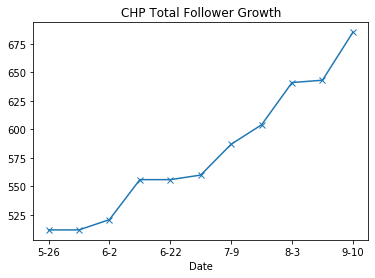

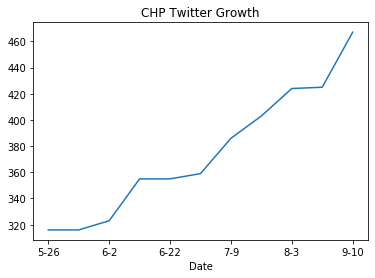

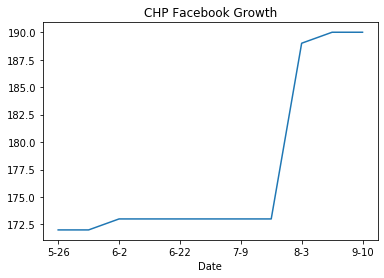

In [7]:
from pandas import read_csv
from matplotlib import pyplot as plt
import numpy as np

series = read_csv('chpFollowers.csv', header=0, index_col=0)
total_followers = series["Followers"]
total_followers.plot(marker="x")
plt.title("CHP Total Follower Growth")
pyplot.show()

facebook = series["Facebook"]
twitter = series["Twitter"]
linkedin = series["LinkedIN"]

twitter.plot()
plt.title("CHP Twitter Growth")
pyplot.show()

facebook.plot()
plt.title("CHP Facebook Growth")
pyplot.show()

Based off of a quick examination of CHP's follower growth since my arrival to the end of my internship, it can be seen that most of our follower growth came from Twitter rather than Facebook. The graphs of "Total Follower Growth" versus "Twitter Growth" follow the exact same patterns. This trend follows with the work that I was doing since content was being sent out on Twitter everyday whereas content was only being put out every other day on Facebook.

The high growth from Twitter can also be better understood with a contextual understanding of Twitter. There generally tends to be more political engagement on Twitter, as opposed to Facebook. Facebook sees an older audience who have more defined political opinions and are less likely to engage with bipartisan content.

I want to look more into the Facebook data to try to understand how we could try to gain more engagement in this less popular platform.

What this next section looks into is how our posts have been tracking in terms of political leaning to ensure that we are staying within our goal of being politically neutral.

In [8]:
df = pd.read_csv("postAnalytics.csv")
leaning_tracker = df.groupby(["Leaning"])["Reach"].count()
leaning_tracker

Leaning
Democratic     2
Neutral       21
Republican     1
Name: Reach, dtype: int64

In [10]:
neutralTotalReach = df.loc[df['Leaning'] == 'Neutral', 'Reach'].sum()
demTotalReach = df.loc[df['Leaning'] == 'Democratic', 'Reach'].sum()
repTotalReach = df.loc[df['Leaning'] == 'Republican', 'Reach'].sum()

In [11]:
demReach = demTotalReach /2
demReach

31.0

In [12]:
repReach = repTotalReach/1
repReach

27.0

In [13]:
avgReach = neutralTotalReach /21
avgReach

93.66666666666667

This number feels pretty high for an average engagement. 

The next graph is a box plot which will help us better understand the median and quartile ranges of all our posts.

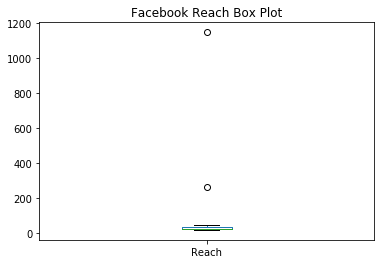

In [44]:
df['Reach'].plot.box(title = 'Facebook Reach Box Plot')

In [33]:
highReach = df[df['Reach'] > 200]
highReach

,ID,Leaning,Reach,Engagement,Date
13,14,Neutral,265,8,07-10-20
17,18,Neutral,1150,269,07-18-20


It looks like all of our posts with very high engagement all have a neutral leaning, which is good. I'm going to create a table which just shows our neutral leaning and try to see if any other information pops out

In [17]:
neutralTable = df.loc[(df["Leaning"]=="Neutral"), ["Leaning", "Reach", "Engagement", "Date"]]
neutralTable

,Leaning,Reach,Engagement,Date
0,Neutral,36,3,06-16-20
1,Neutral,25,1,06-18-20
2,Neutral,37,5,06-20-20
3,Neutral,34,7,06-22-20
4,Neutral,29,4,06-24-20
5,Neutral,20,3,06-26-20
6,Neutral,30,1,06-28-20
7,Neutral,25,2,06-30-20
8,Neutral,43,8,07-1-20
10,Neutral,25,2,07-3-20


It looks like most of our posts stay within a super similar range. However, there's a couple of interesting things to note here. 

The post with index 17 was an article that we had published talking about how to regain a sense of control as COVID-19 took over our lives. It was an article that we had reposted from one of our grantees, The One America Movement. We had also used the Facebook boosting feature to promote this article so it makes sense that it would have the highest engagement. 

The post with index 13 was one that we had surprinsingly not boosted (i.e. the engagement was natural). The article was not linked to any of our grantees and was an op-ed on how teaching taight the writer about the effects on political polarization on the future generation. Given that the Facebook community tends to lean more towards an older generation, spefically of parents, it tracks with our previous knowledge that this post would do well. 
One key takeaway from the reach of this post is that content that speaks to the idea of the impact of political polarization on the future generation speaks to the values of both Democrats and Republicans, and is therefore more likely to succeed.

Finally, the post with index 19, while only having a reach of 47, is a MASSIVE success. The ratio of engagement to reach is higher than any of our other posts, including posts that we boosted. Looking back into our post collector, this post spoke to how the left and right are actually less divided than we think and was an article republished from AllSides, one of our grantees. 

KEY TAKEAWAYS: 
- Posts that focus on the idea of collective healing, or collective ideaology, tend to spark more engagement than posts that analyze the differences between the political parties.
- Content which is associated with our grantees does better than content collected from elsewhere. Continuing to promote their work on our social media platforms would be beneficial to both parties.

The next thing I'm going to do is take a look at our reach for neutral Facebook posts, but I'm going to take away the high outlier from the Facebook post we boosted. The reason I'm doing this is because I think that understand how our posts generally track will help us manage our expectations as we continue to grow

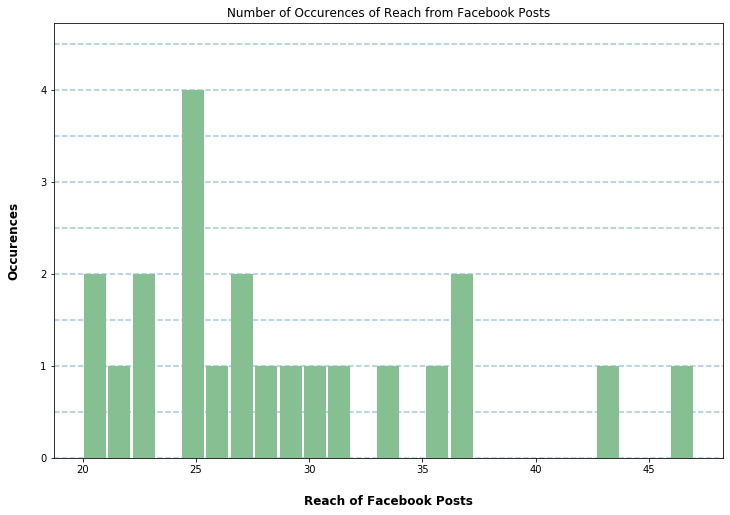

In [48]:
netNeutral = df[100 > df['Reach']]
ax = netNeutral.hist(column='Reach', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, zorder=1)

    # Remove title
    x.set_title("Number of Occurences of Reach from Facebook Posts")

    # Set x-axis label
    x.set_xlabel("Reach of Facebook Posts", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Occurences", labelpad=20, weight='bold', size=12)

In general, I would say that our social media strategy on Facebook has been working well, but there's definitly room for improvement. We've been staying on par with our goal of remaining politically neutral which is positive. Our posts get a variety of engagement and reach, and discovering what type of content gets more engagement can help us better communicate with our followers.

The final thing that I want to do is track the growth of CHP relative to the growth of other companies who, at the beginning of my internship, had a similar follower count.

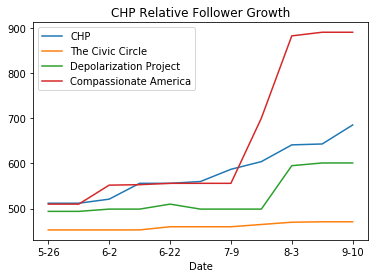

In [50]:
competition = read_csv('followersTracking.csv', header=0, index_col=0)
competition.plot()
plt.title("CHP Relative Follower Growth")
pyplot.show()

Unfortunately, this graph is not super effective. While we see that by September, we were doing relatively well compared to the other three companies, we were not effective enough in collecting data. Consequently, we see a huge jump in followers in Compassionate America, but it's difficult to understand if this growth occured over time or is a result of a specific even.

FINAL NOTES:
- CHP has been steadily growing and, should we continue on this same trajectory, will continue to grow. 
- The content that we are putting out on Facebook may not be perfectly tailored to our audiences. Currently, we are posting the same content on Facebook as we are on Twitter. As seen above, our growth in Twitter followers has been substantial whereas Facebook is not seeing much engagement. By examining the posts that have succeeded on Facebook, we can understand that this is because there is a fundamental difference in the audiences on the two social media platforms.

FINAL RECOMMENDATIONS
- Update the KPI tracking sheet for all of our competitors at least once a week so that we can gage a better understanding of how we are doing relative to others
- Post more content that is related to our grantees as the combined audiences results in more engagement
- Continue posting all articles and videos on Twitter. Reconsider the content being put out on Facebook (maybe we design a new plan for how to best engage with Facebook)
- Don't expect to be getting hundreds of comments and views on all of our posts. We are still a relatively small non-profit. Focusing more on refining the content we put out will be more effective in helping us grow than attempting to copy the marketing strategies of companies with much higher follower counts than us. 